<a href="https://colab.research.google.com/github/Buddhikagayan99/E-19-022/blob/main/mechanics/assignments/ME421_ControlSystems_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete Tasks#1 and Task#2 by 5:00PM on 18/01/2024

* Complete Tasks#3 and the Task#4 by 5:00PM on 25/01/2024 and demonstrate the work in the class on 01/02/2024.

* Complete Task#5 by 5:00PM on 08/02/2024 and submit the link to your working repository by midnight 08/02/2024.

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

### Translational Motion
Newton's Second Law states that the rate of change of linear momentum equals the net external force:
\begin{equation}
    \frac{d}{dt} (M \dot{\mathbf{o}}) = \mathbf{f}^e + \mathbf{f}^u.
\end{equation}
Since $M$ is constant, we obtain:
\begin{equation}
    \dot{\mathbf{o}} = \frac{1}{M} \mathbf{p}, \quad \dot{\mathbf{p}} = \mathbf{f}^e + \mathbf{f}^u.
\end{equation}

### Rotational Motion
The angular momentum of the rigid body is given by:
\begin{equation}
    \boldsymbol{\pi} = \mathbb{I} \boldsymbol{\omega}.
\end{equation}
Taking the time derivative,
\begin{equation}
    \dot{\boldsymbol{\pi}} = \mathbb{I} \dot{\boldsymbol{\omega}} + \dot{\mathbb{I}} \boldsymbol{\omega}.
\end{equation}
Assuming $\mathbb{I}$ is constant in the body frame,
\begin{equation}
    \dot{\boldsymbol{\pi}} = \mathbb{I} \dot{\boldsymbol{\omega}}.
\end{equation}
From Euler's equations,
\begin{equation}
    \mathbb{I} \dot{\boldsymbol{\omega}} = \boldsymbol{\tau}^e + \boldsymbol{\tau}^u.
\end{equation}
Solving for $\dot{\boldsymbol{\pi}}$,
\begin{equation}
    \dot{\boldsymbol{\pi}} = \boldsymbol{\tau}^e + \boldsymbol{\tau}^u.
\end{equation}

Finally, the rotational kinematics equation is given by:
\begin{equation}
    \dot{\mathbf{R}} = \hat{\boldsymbol{\omega}} \mathbf{R}.
\end{equation}

#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

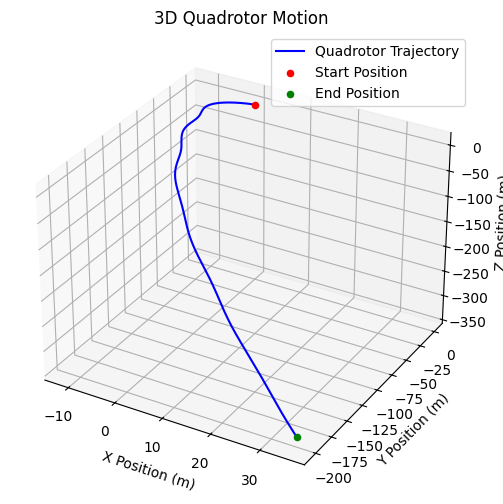

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Constants
M = 1.0  # Mass of quadrotor (kg)
I = np.diag([0.02, 0.02, 0.04])  # Inertia tensor
g = 9.81  # Gravity (m/s^2)
e3 = np.array([0, 0, 1])  # Unit vector in z-direction

# Skew-symmetric function
def skew_symmetric(w):
    return np.array([[0, -w[2], w[1]],
                     [w[2], 0, -w[0]],
                     [-w[1], w[0], 0]])

# Quadrotor Dynamics
def quadrotor_dynamics(t, state):
    x, v, R_flat, omega = np.split(state, [3, 6, 15])
    R = R_flat.reshape((3, 3))

    # Control forces (thrust is slightly tilted to add motion)
    f_thrust = np.array([0.5, 0.2, M * g])  # Slight tilt for forward motion
    tau = np.array([0.01, -0.02, 0.01])  # Small torques

    # Equations of motion
    dxdt = v
    dvdt = -g * e3 + (1/M) * R @ f_thrust
    dRdt = R @ skew_symmetric(omega)
    domegadt = np.linalg.inv(I) @ (tau - np.cross(omega, I @ omega))

    return np.concatenate([dxdt, dvdt, dRdt.flatten(), domegadt])

# Initial Conditions
x0 = np.array([0, 0, 0])  # Initial position
v0 = np.array([0, 0, 0])  # Initial velocity
R0 = np.eye(3).flatten()  # Identity rotation matrix
omega0 = np.array([0, 0, 0])  # Initial angular velocity
state0 = np.concatenate([x0, v0, R0, omega0])

# Time span
t_span = (0, 10)  # Simulate for 10 seconds
t_eval = np.linspace(0, 10, 200)  # Time evaluation points

# Solve ODE
sol = solve_ivp(quadrotor_dynamics, t_span, state0, t_eval=t_eval)

# Extract position data
x_vals = sol.y[0, :]
y_vals = sol.y[1, :]
z_vals = sol.y[2, :]

# 3D Plot of the trajectory
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, label="Quadrotor Trajectory", color="blue")
ax.scatter(x_vals[0], y_vals[0], z_vals[0], color="red", label="Start Position")
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1], color="green", label="End Position")

# Labels and title
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")
ax.set_title("3D Quadrotor Motion")
ax.legend()
plt.show()

#Task#3

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

#Task#4

Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing the twin rotor setup in the lab.

#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.